# Elmer Esteban
### Tarea de Tokenizacion

In [342]:
#Librerias a utilizar
import pandas as pd
from collections import Counter
import re
import io
import requests
import numpy as np 
import matplotlib.pyplot as plt

1. Se juntaron documentos con números crecientes de tokens hasta llegar a 1 millón de tokens. 

In [336]:
url="https://raw.githubusercontent.com/est201459/TextMining/master/tripadvisor_reviews.csv"

In [337]:
read_data=requests.get(url).content

In [338]:
notas = pd.read_csv(io.StringIO(read_data.decode('utf-8')))

In [343]:
# Muestra del set de datos
notas.head()

,rating,review
0,50,Excelente hotel muy buen servicio muy buena co...
1,50,Me encantaron las instalaciones la ubicación y...
2,50,Excelente servicio por en Aurum por parte de A...
3,50,Excelente servicio amabilidad instalaciones y ...
4,40,Nos encantó nuestra habitación PERO éramos dos...


# Normalización y stemming.

Como son comentarios vamos a quitar caracteres especiales y trabajar todo con minusculas. 


In [344]:
## Hacemos un poco de data Preparation
notas['review']=notas['review'].str.replace(',', '')
notas['review']=notas['review'].str.replace('.', '')
notas['review']=notas['review'].str.replace('(', '')
notas['review']=notas['review'].str.replace(')', '')
notas['review']=notas['review'].str.replace('!', '')
notas['review']=notas['review'].str.replace('?', '')
notas['review']=notas['review'].str.replace('¿', '')
notas_findal =  pd.Series(notas['review']).str.lower() 

In [345]:
#Tamaño de los Review
notas_findal.size

51985

In [388]:
#Declaracion de Variables
lista=[]
tokens=[]
del tokens[:]
del lista[:]

In [395]:
for x in range(0,notas_findal.size):
    text =notas_findal[x]
    tokens.extend ( re.split('\W', text))
    y=len(tokens)
    z=np.unique(np.array(tokens)).itemsize 
    lista.append([y,z,z/y])    
    if y>10000:
        break

In [390]:
#Convierto la lista en un dataframe para graficarlo despues
df = pd.DataFrame(lista, columns = ['Token', 'Unicos','Proporcion']) 

In [391]:
df

,Token,Unicos,Proporcion
0,61,44,0.721311
1,103,56,0.543689
2,133,60,0.451128
3,164,60,0.365854
4,205,60,0.292683
...,...,...,...
10099,762240,252,0.000331
10100,762370,252,0.000331
10101,762451,252,0.000331
10102,762581,252,0.000330


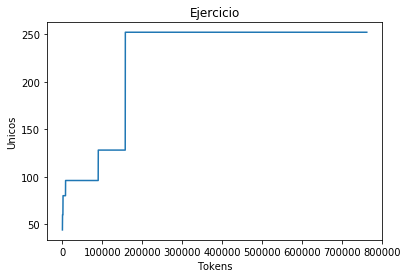

In [392]:
plt.plot(df.Token,df.Unicos)
plt.xlabel('Tokens')
plt.ylabel('Unicos')
plt.title('Ejercicio')
plt.show()

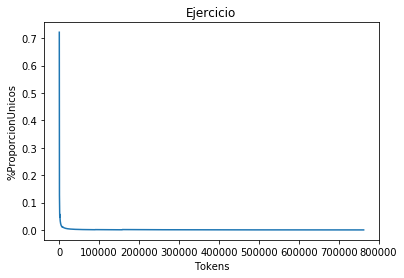

In [393]:
plt.plot(df.Token,df.Proporcion)
plt.xlabel('Tokens')
plt.ylabel('%ProporcionUnicos')
plt.title('Ejercicio')
plt.show()

In [394]:
counts = Counter(tokens)
print(counts.most_common())

[('de', 32317), ('y', 31111), ('la', 25990), ('el', 25898), ('en', 20045), ('', 17436), ('que', 16057), ('muy', 13219), ('es', 12530), ('un', 11944), ('a', 10975), ('hotel', 9391), ('una', 8832), ('las', 8637), ('con', 8609), ('para', 8389), ('no', 6922), ('los', 6397), ('del', 6200), ('por', 5327), ('nos', 5082), ('personal', 4933), ('era', 4793), ('lo', 4761), ('pero', 3934), ('al', 3905), ('me', 3690), ('habitaciones', 3589), ('todo', 3437), ('excelente', 3392), ('desayuno', 3337), ('se', 3306), ('son', 3253), ('habitación', 3195), ('este', 3094), ('servicio', 3072), ('bien', 2908), ('fue', 2760), ('buena', 2710), ('lugar', 2694), ('mi', 2591), ('piscina', 2589), ('comida', 2571), ('como', 2451), ('más', 2153), ('su', 2146), ('está', 2070), ('amable', 1956), ('si', 1933), ('hay', 1776), ('sin', 1762), ('atención', 1737), ('restaurante', 1711), ('nuestra', 1681), ('tiene', 1588), ('buen', 1581), ('mejor', 1549), ('estaba', 1540), ('ubicación', 1521), ('noche', 1506), ('agradable', 14

In [374]:
#Total de Tokens
len(tokens)

1061

In [375]:
 np.unique(np.array(tokens)).itemsize 

60

### Grafica del Vocabulario con 1k Tokens

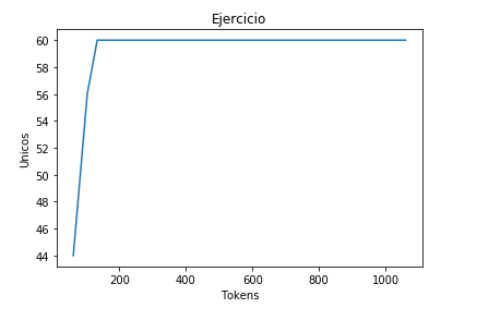


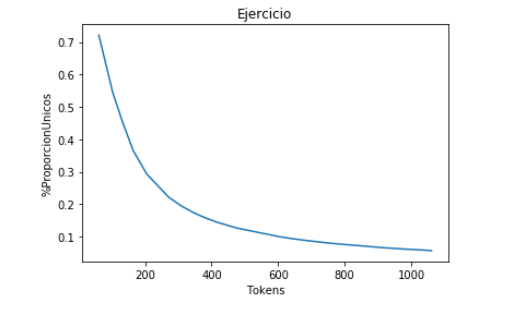


### Grafica del Vocabulario con 10k Tokens
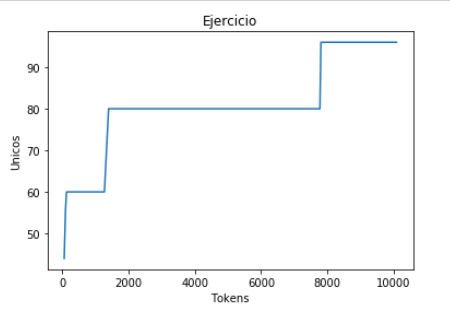

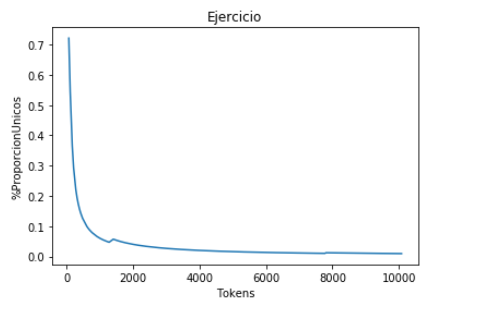

# Grafica del Vocabulario con 100k Tokens
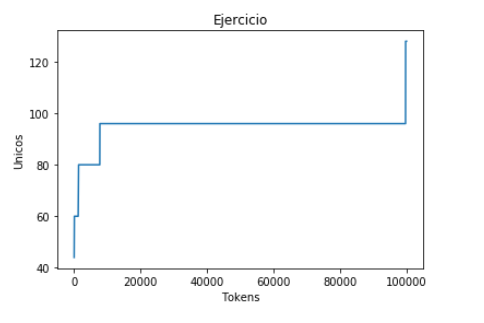

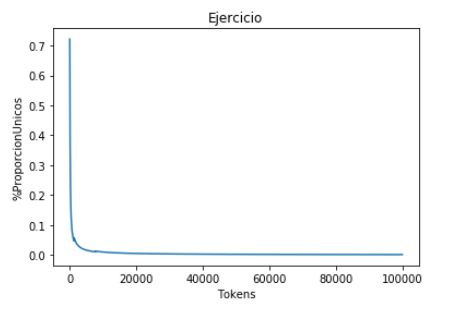

# Grafica del Vocabulario con 800k Tokens
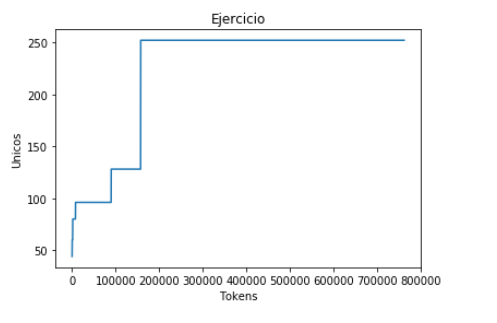

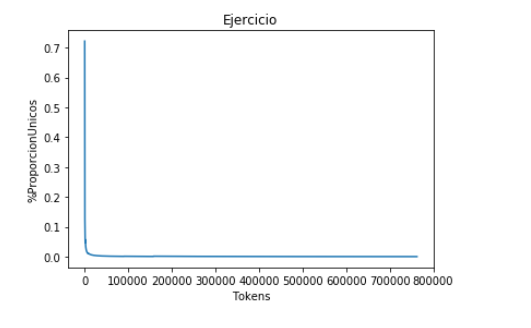
